In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

The first exercise is about using Newton's method to find the cube roots of unity - find $z$ such that $z^3 = 1$. From the fundamental theorem of algebra, we know there must be exactly 3 complex roots since this is a degree 3 polynomial.

We start with Euler's equation
$$
e^{ix} = \cos x + i \sin x
$$

Raising $e^{ix}$ to the $n$th power where $n$ is an integer, we get from Euler's formula with $nx$ substituting for $x$
$$
(e^{ix})^n = e^{i(nx)} = \cos nx + i \sin nx
$$

Whenever $nx$ is an integer multiple of $2\pi$, we have
$$
\cos nx + i \sin nx = 1
$$

So
$$
e^{2\pi i \frac{k}{n}}
$$
is a root of 1 whenever $k/n = 0, 1, 2, \ldots$.

So the cube roots of unity are $1, e^{2\pi i/3}, e^{4\pi i/3}$. 

While we can do this analytically, the idea is to use Newton's method to find these roots, and in the process, discover some rather perplexing behavior of Newton's method.

In [2]:
from sympy import Symbol, exp, I, pi, N, expand
from sympy import init_printing 
init_printing()

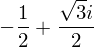

In [3]:
expand(exp(2*pi*I/3), complex=True)

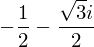

In [4]:
expand(exp(4*pi*I/3), complex=True)

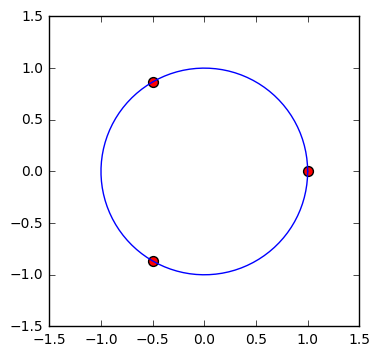

In [5]:
plt.figure(figsize=(4,4))
roots = np.array([[1,0], [-0.5, np.sqrt(3)/2], [-0.5, -np.sqrt(3)/2]])
plt.scatter(roots[:,0], roots[:,1], s=50, c='red')
xp = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(xp), np.sin(xp), c='blue');

**1**.  Newton's method for functions of complex variables - stability and basins of attraction. (30 points)

1. Write a function with the following function signature `newton(z, f, fprime, max_iter=100, tol=1e-6)` where
    - `z` is a starting value (a complex number e.g.  ` 3 + 4j`)
    - `f` is a function of `z`
    - `fprime` is the derivative of  `f`
The function will run until either max_iter is reached or the absolute value of the Newton step is less than tol. In either case, the function should return the number of iterations taken and the final value of `z` as a tuple (`i`, `z`). 

2. Define the function `f` and `fprime` that will result in Newton's method finding the cube roots of 1. Find 3 starting points that will give different roots, and print both the start and end points. 

Write the following two plotting functions to see some (pretty) aspects of Newton's algorithm in the complex plane.

3. The first function `plot_newton_iters(f, fprime, n=200, extent=[-1,1,-1,1], cmap='hsv')` calculates and stores the number of iterations taken for convergence (or max_iter) for each point in a 2D array. The 2D array limits are given by `extent` - for example, when `extent = [-1,1,-1,1]` the corners of the plot are `(-i, -i), (1, -i), (1, i), (-1, i)`. There are `n` grid points in both the real and imaginary axes. The argument `cmap` specifies the color map to use - the suggested defaults are fine. Finally plot the image using `plt.imshow` - make sure the axis ticks are correctly scaled. Make a plot for the cube roots of 1.

4. The second function `plot_newton_basins(f, fprime, n=200, extent=[-1,1,-1,1], cmap='jet')` has the same arguments, but this time the grid stores the identity of the root that the starting point converged to. Make a plot for the cube roots of 1 - since there are 3 roots, there should be only 3 colors in the plot.

In [6]:
## Write the newton function
def newton(z, f, fprime, max_iter=100, tol=1e-6):
    '''Function to implement newtons method'''
    current_iter=0
    
    #until we reach the max iterations
    while current_iter<max_iter:
        
        #calculate the new z value 
        newz=z-(f(z)/fprime(z))
        #update current iteration
        current_iter=current_iter+1
        #if difference is less than tolerance, return the values 
        if abs(newz-z)<=tol:
            return (current_iter, newz)
        z=newz
        
    #after max iterations, return the values. 
    return (current_iter,z)

In [7]:
#function for f
def f(x):
    '''f function '''
    return x**3-1

#function for fprime
def fprime(x):
    '''f prime Function '''
    return 3*x**2

#Find three starting points that give three different roots 
start1=newton(f=f,fprime=fprime, z=complex(3,2))
print("Starting Point 1: ",complex(3,2))
print("Number of Iterations: ",start1[0])
print("Root: ",start1[1])
start2=newton(f=f,fprime=fprime, z=complex(-3,2))
print("\n \nStarting Point 2: ",complex(-3,2))
print("Number of Iterations: ",start2[0])
print("Root: ",start2[1])
start3=newton(f=f,fprime=fprime, z=complex(-320,-200))
print("\n \nStarting Point 3: ",complex(1,-120))
print("Number of Iterations: ",start3[0])
print("Root: ",start3[1])

Starting Point 1:  (3+2j)
Number of Iterations:  9
Root:  (1-4.3531995322736974e-24j)

 
Starting Point 2:  (-3+2j)
Number of Iterations:  8
Root:  (-0.4999999999999997+0.8660254037844388j)

 
Starting Point 3:  (1-120j)
Number of Iterations:  20
Root:  (-0.5-0.8660254037844387j)


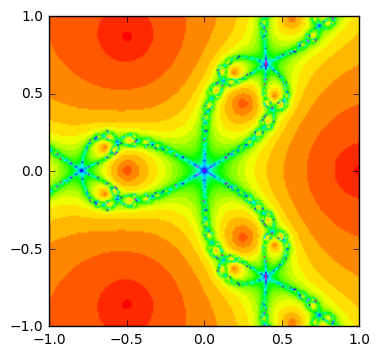

In [8]:
from __future__ import division

def plot_newton_iters(f, fprime, n=200, extent=[-1,1,-1,1], cmap='hsv'):
    """Function that calculates and stores the number of iterations 
    taken for convergence (or max_iter) for each point in a 2D array"""
    
    #create new matrix
    new_matrix=np.zeros([n,n])
    x_values= np.linspace(extent[0],extent[1],n)
    y_values=np.linspace(extent[2],extent[3],n)
    
    #iterate through n
    for i in range(n):
    
        x = x_values[i]
        for j in range (n):
            y=y_values[j]
            
            #call newton function and add to matrix
            new_matrix[j,i]=newton(f=f,fprime=fprime,z=complex(x,y))[0]
    #show the plot
    plt.imshow(new_matrix,cmap=cmap, extent=extent)
    
#test the fu
plot_newton_iters(f, fprime) 

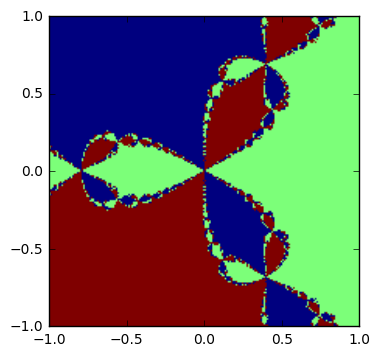

In [9]:
def plot_newton_basins(f, fprime, n=200, extent=[-1,1,-1,1], cmap='jet') :
    """function in which the grid stores the identity of the root that the starting point converged to"""
    
    #create new matrix
    new_matrix=np.zeros([n,n])
    
    x_values= np.linspace(extent[0],extent[1],n)
    y_values=np.linspace(extent[2],extent[3],n)
    
    #intialize list to store roots in
    roots=[]
    
    #iterate through n
    for i in range(n):
    
        x = x_values[i]
        for j in range (n):
            y=y_values[j]
            #call newton function and add to matrix
            new=newton(f=f,fprime=fprime,z=complex(x,y))[1]
            
            #store the rounded and complex parts of the roots 
            new1=round(new.real,1)
            new2=round(new.imag,1)
            
            #if root hasn't already been found then add to the list 
            if [new1,new2] not in roots:
                roots.append([new1,new2])
            
            #keep track of root in new matrix 
            new_matrix[j,i]=roots.index([new1,new2])
    #show the plot
    plt.imshow(new_matrix,cmap=cmap, extent=extent)
    
#test the function
plot_newton_basins(f, fprime) 
    

**2**.  Ill-conditioned linear problems. (20 points)

You are given a $n \times p$ design matrix $X$ and a $p$-vector of observations $y$ and asked to find the coefficients $\beta$ that solve the linear equations $X \beta = y$. 
```python
X = np.load('x.npy')
y = np.load('y.npy')
```

The solution $\beta$ can also be loaded as
```python
beta = np.load('b.npy')
```

- Write a formula that could solve the system of linear equations in terms of $X$ and $y$ Write a function `f1` that takes arguments $X$ and $y$ and returns $\beta$ using this formula.
- How could you code this formula using `np.linalg.solve` that does not require inverting a matrix? Write a function `f2` that takes arguments $X$ and $y$ and returns $\beta$ using this.
- Note that carefully designed algorithms *can* solve this ill-conditioned problem, which is why you should always use library functions for linear algebra rather than write your own.
```python
np.linalg.lstsq(x, y)[0]
```
- What happens if you try to solve for $\beta$ using `f1` or `f2`? Remove the column of $X$ that is making the matrix singular and find the $p-1$ vector $b$ using `f2`.
- Note that the solution differs from that given by `np.linalg.lstsq`? This arises because the relevant condition number for `f2` is actually for the matrix $X^TX$ while the condition number of `lstsq` is for the matrix $X$. Why is the condition so high even after removing the column that makes the matrix singular?

In [10]:
X = np.load('x.npy')
y = np.load('y.npy')

beta = np.load('b.npy')

In [11]:
import numpy.linalg as linalg

print("A formula to solve the system of linear equations is beta=(X'X)^-1(X'y)")
def f1(X,y):
    '''Implement formula to solve system of linear equations'''
    #return beta
    return linalg.inv((X.T @ X))@(X.T @ y)

A formula to solve the system of linear equations is beta=(X'X)^-1(X'y)


In [12]:
def f2(X, y):
    '''Function using la solve'''
    return linalg.solve(X.T @ X, X.T @ y)

In [13]:
#try f1 and f2 and built in 
print("f1 solution:",f1(X,y))
print("\nf2 solution:",f2(X,y))

#try built in
print("\nBuilt in solution:",linalg.lstsq(X, y)[0])

#compare to actual beta. Clearly f1 and f2 are pretty far off from the built in
#and from the actual values 
print("\nActual values:",beta)

f1 solution: [  1.77788105e+13  -2.97258108e-01   1.70955196e+12   0.00000000e+00
   5.20507812e-01  -4.39804651e+12]

f2 solution: [  4.67303184e-01   9.61722604e-02   9.09592201e-01   1.59634326e+13
   5.24240132e-01  -1.59634326e+12]

Built in solution: [ 0.46889324  0.09617226  0.90301541  0.00945595  0.52562031  0.09455951]

Actual values: [ 0.46923853  0.09617226  0.90337017  0.11949047  0.52479938  0.083623  ]


In [14]:
print(X)
#Two columns are multiples so remove one of them
X=X[:,:5]

[[  5.00000000e+00   4.81600000e+14   9.00000000e+00   5.00000000e+00
    0.00000000e+00   5.00000000e+01]
 [  1.00000000e+00   4.21400000e+14   6.00000000e+00   9.00000000e+00
    2.00000000e+00   9.00000000e+01]
 [  5.00000000e+00   1.20400000e+14   4.00000000e+00   2.00000000e+00
    4.00000000e+00   2.00000000e+01]
 [  7.00000000e+00   5.41800000e+14   1.00000000e+00   7.00000000e+00
    0.00000000e+00   7.00000000e+01]
 [  9.00000000e+00   5.41800000e+14   7.00000000e+00   6.00000000e+00
    9.00000000e+00   6.00000000e+01]
 [  0.00000000e+00   6.02000000e+13   8.00000000e+00   8.00000000e+00
    3.00000000e+00   8.00000000e+01]
 [  8.00000000e+00   4.21400000e+14   3.00000000e+00   6.00000000e+00
    5.00000000e+00   6.00000000e+01]
 [  9.00000000e+00   1.80600000e+14   4.00000000e+00   8.00000000e+00
    1.00000000e+00   8.00000000e+01]
 [  0.00000000e+00   1.80600000e+14   9.00000000e+00   2.00000000e+00
    0.00000000e+00   2.00000000e+01]
 [  9.00000000e+00   1.20400000e+14  

In [15]:
#retry with last column of X removed. 
print("f1 solution:",f1(X,y))
print("\nf2 solution:",f2(X,y))
print("\nActual values:",beta)

## Now the values are much more similar to the real values except for the 4th column. 
## The 4th column is much higher in the f1 and f2 values than the actual values

f1 solution: [ 0.46484375  0.09617226  0.90429688  0.95703125  0.52050781]

f2 solution: [ 0.47021282  0.09617226  0.90554511  0.95617044  0.52384748]

Actual values: [ 0.46923853  0.09617226  0.90337017  0.11949047  0.52479938  0.083623  ]


In [16]:
U, s, V = linalg.svd(X)
print(s)
#From printing the singular values, you can see that one is much larger than the others.
#As mentioned in the hints, if the ratio of the largest to the smallest singular value is large,
#errors are amplified. This is likely because one columns is "almost" dependent

[  1.12784664e+15   1.86256275e+01   1.22438165e+01   8.02496217e+00
   6.08580711e+00]


**3**. Consider the following function on $\mathbb{R}^2$:

$$f(x_1,x_2) = -x_1x_2e^{-\frac{(x_1^2+x_2^2)}{2}}$$

1. Write down its gradient.
2. write down the Hessian matrix. 
3. Find the critical points of $f$.
4. Characterize the critical points as max/min or neither. Find the minimum under the constraint 
$$g(x) = x_1^2+x_2^2 \leq 10$$
and 
$$h(x) = 2x_1 + 3x_2 = 5$$ using `scipy.optimize.minimize`.
5. Plot the function contours using `matplotlib`. (20 points)

In [17]:
import sympy as sy
from sympy import init_session
init_session()

IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


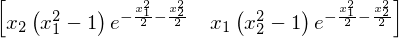

In [18]:
## Find the Gradient
x1, x2 = sy.symbols('x1 x2')
f = sy.symbols('f', cls=sy.Function)
f = sy.Matrix([-x1*x2*sy.exp((-x1**2 -x2**2)/2)])
sy.simplify(f.jacobian(sy.Matrix([x1,x2])))

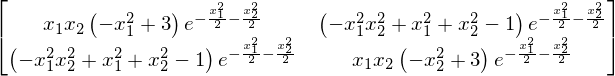

In [19]:
## Find the Hessian
sy.simplify(sy.hessian(f, sy.Matrix([x1,x2])))

In [20]:
## Find the critical points of  f
print("Critical Points of f:")
sy.solve(f.jacobian(sy.Matrix([x1,x2])), sy.Matrix([x1,x2]))

Critical Points of f:


In [21]:
#Characterize the critical points as max/min or neither
critical_points=sy.solve(f.jacobian(sy.Matrix([x1,x2])), sy.Matrix([x1,x2]))
Hessian=sy.hessian(f, sy.Matrix([x1,x2]))

import numpy as np
import scipy.linalg as la


for points in critical_points:
    
    #calculate the second derivate and evalute at critical points 
    f_xx=np.array(Hessian[0,0].subs(dict(zip(sy.Matrix([x1,x2]), points)))).astype('float')
    
    #calculate determiniate of hessian and evaluate 
    determ=np.array(Hessian.subs(dict(zip(sy.Matrix([x1,x2]), points))).det()).astype('float')
    
    #use second derivative and hessian to determine if max, min, or saddle
    if determ<0:
        print("Critical Points:", points, "Saddle")
    elif determ>0 and f_xx<0:
        print("Critical Points:", points, "Maximum")
    else:
        print("Critical Points:", points, "Minimum")

Critical Points: (-1, -1) Minimum
Critical Points: (-1, 1) Maximum
Critical Points: (0, 0) Saddle
Critical Points: (1, -1) Maximum
Critical Points: (1, 1) Minimum


In [22]:
# find minimum under the constraints given in the problem
import scipy.optimize 

### First define constraints 
#define f function 
def f(X_values):
    '''Function for f'''
    return -X_values[0] * X_values[1] * np.exp((-X_values[0]**2 - X_values[1]**2)/2)

#define h function
def h(X_values):
    '''h function'''
    return 2.0*X_values[0] + 3.0*X_values[1] - 5.0
   
def g(X_values):
    '''g function'''
    return 10.0-(X_values[0]**2.0 + X_values[1]**2.0)
   
#find minimum 
scipy.optimize.minimize(f, [1.5,1.5], constraints=({'type': 'eq',
         'fun' : h},
        {'type': 'ineq',
         'fun' : g})) 


     fun: -0.36787932833276132
     jac: array([-0.00033911,  0.00022599,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([ 0.9995392,  1.0003072])

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in sqrt


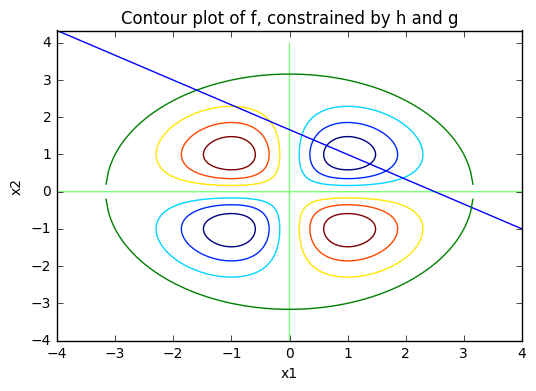

In [23]:
x = np.linspace(-4, 4, 200)
y = np.linspace(-4, 4, 2000)
X, Y = np.meshgrid(x, y)
Z=f([X, Y])

plt.contour(X, Y, Z)
plt.title('Contour plot of f, constrained by h and g')
plt.plot(x, np.sqrt(-x**2+10),color="g")
plt.plot(x, (-2*x+5)/3)
plt.plot(x, -np.sqrt(-x**2+10))
plt.xlabel('x1')
plt.ylabel('x2')

**4**. One of the goals of the course it that you will be able to implement novel algorithms from the literature.  (30 points)

- Implement the mean-shift algorithm in 1D as described [here](http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/TUZEL1/MeanShift.pdf). 
    - Use the following function signature
    ```python
    def mean_shift(xs, x, kernel, max_iters=100, tol=1e-6):
    ```
    - xs is the data set, x is the starting location, and kernel is a kernel function
    - tol is the difference in $||x||$ across iterations
- Use the following kernels with bandwidth $h$ (a default value of 1.0 will work fine)
    - Flat - return 1 if $||x|| < h$ and 0 otherwise
    - Gaussian 
    $$\frac{1}{\sqrt{2 \pi h}}e^{\frac{-||x||^2}{h^2}}$$
    - Note that $||x||$ is the norm of the data point being evaluated minus the current value of $x$
- Use both kernels to find all 3 modes of the data set in `x1d.npy`
- Modify the algorithm and/or kernels so that it now works in an arbitrary number of dimensions.
- Use both kernels to find all 3 modes of the data set in `x2d.npy`
- Plot the path of successive intermediate solutions of the mean-shift algorithm starting from `x0 = (-4, 10)` until it converges onto a mode in the 2D data for each kernel. Superimpose the path on top of a contour plot of the data density.

In [24]:
### mean shift algoirthm 
def mean_shift(xs, x, kernel, max_iters=10, tol=1e-6):
    
    """Function to implement the mean shift algorithm"""
    
    x_values = x
    
    #go through each iteration
    j=0
    while j<=max_iters:
        
        #call kernel function
        kern = kernel(xs, x, h=1)
    
        #calculate m
        num=0
        den=0
        for i in range(len(xs)):
            num=num+kern[i]*xs[i]
            den=den+kern[i]
        m=num/den-x
        
        #update x
        x = x + m
        x_values.append(x)
        
        #return if less than tol
        if np.sqrt(np.dot(m,m)) < tol:
            return np.array(x_values)
        j=j+1
    return np.array(x_values)

In [25]:
# Define the kernel functions 
def flat_kernel(xs, x, h=1):
    """Function that returns the flat kernel"""
    
    #point behing evluated minus the current x 
    x_value = xs - x
    return_values = np.zeros(len(x_value), 'float')
    
    #calculate the norms
    for i in range(len(x_value)):
        return_values[i] = np.sqrt(np.sum(x_value[i] **2)) < h
        
    #return one or zero
    return return_values

def gaussian_kernel(xs, x, h=1):
    """Function that returns the gaussian kernel"""
    
    #point behing evluated minus the current x 
    x_values = xs - x
    return_values = np.zeros(len(x_values), 'float')
    #calculate the norms
    for i in range(len(x_values)):
        return_values[i] = np.exp(-np.sum(x_values[i]**2)/(2*h**2))
        
    #return the values
    return return_values




In [26]:
#test on x1d dataset
x1d = np.load('x1d.npy')
start_values = [[-5], [0], [5]]
list1=[]
print("Flat Kernel:")
for j in start_values:
    list1.append(mean_shift(x1d, j, flat_kernel)[-1])
print(list1)
list2=[]
start_values = [[-5], [0], [5]]
print("\nGaussian Kernel:")  
for i in start_values:
    list2.append(mean_shift(x1d, i, gaussian_kernel)[-1])
print(list2)

Flat Kernel:
[-4.9950246796462965, 0.32219635208455333, 3.9806618178701476]

Gaussian Kernel:
[-4.8724566121774666, 0.69515347799685501, 3.8064391955126178]


In [27]:
#Modify the algorithm and/or kernels so that it now works in an arbitrary number of dimensions.
import numpy.core.umath_tests as npc

def flat_kernel2(xs, x, h=1):
    """flat kernel for arbitrary number of dim"""
    x_value = xs - x
    return np.sqrt(npc.inner1d(x_value, x_value)) < h

def gaussian_kernel2(xs, x, h=1):
    """flat kernel for arbitrary number of dim"""
    x_value = xs - x
    return np.exp(-npc.inner1d(x_value, x_value)/(2*h**2))

def mean_shift2(xs, x, kernel, max_iters=10, tol=1e-6):
    """mean shift for arbitrary number of dim"""
    x_values = [x]
    
    #go through each iteration
    i=0
    while i<=max_iters:
        
        #call kernel function
        kern = kernel(xs, x, h=1)
        for j in range(len(x)-1):
            kern = kern[:, None]
        new=np.sum(xs*kern, 0)/sum(kern)
        m = new - x
        
        #update x
        x = x +m
        x_values.append(x)
        
        #return if less than tol
        if np.sqrt(np.dot(m,m)) < tol:
            return np.array(x_values)
        i=i+1
    return np.array(x_values)

In [28]:
#test on 2d data
x2d = np.load('x2d.npy')
start_values = [[0,0], [1,2], [5,5]]

print("Flat Kernel:")
list3=[]
for x in start_values:
    list3.append(mean_shift2(x2d, x, flat_kernel2)[-1])
print(list3)

start_values = [[0,0], [1,2], [5,5]]
list4=[]
print("\nGaussian Kernel:")  
for i in start_values:
    list4.append(mean_shift2(x2d, x, flat_kernel2)[-1])
print(list4)

Flat Kernel:
[array([ 1.14721975,  2.14230347]), array([ 1.73559104,  2.43188918]), array([ 3.00487288,  3.5839112 ])]

Gaussian Kernel:
[array([ 3.00487288,  3.5839112 ]), array([ 3.00487288,  3.5839112 ]), array([ 3.00487288,  3.5839112 ])]


Flat Kernel


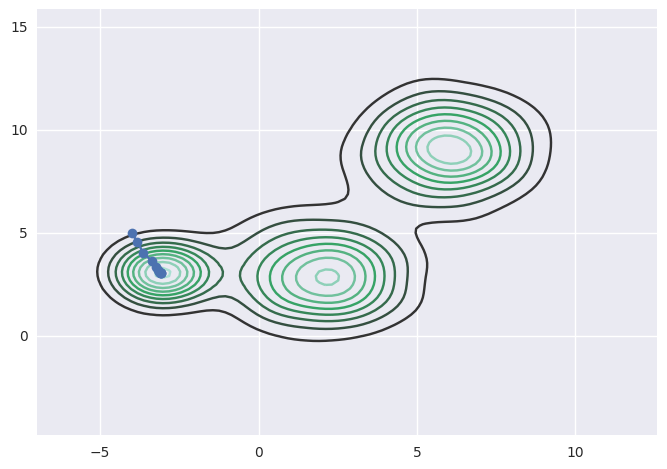

In [29]:
#Plot the path of successive intermediate solutions of the mean-shift algorithm 
#starting from x0 = (-4, 10) until it converges onto a mode in the 2D data for 
#each kernel. Superimpose the path on top of a contour plot of the data density.

import seaborn as sns
print("Flat Kernel")
x0=[-4,5]
plot_path=mean_shift2(x2d, x0, flat_kernel2)
sns.kdeplot(x2d)
plt.plot(plot_path[:,0], plot_path[:,1], '-o')





Gaussian Kernel


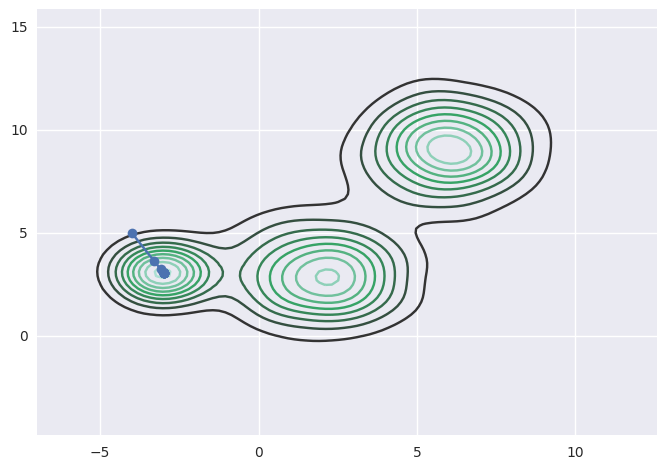

In [30]:
x0=[-4,5]
print("Gaussian Kernel")

plot_path=mean_shift2(x2d, x0, gaussian_kernel2)
sns.kdeplot(x2d)
plt.plot(plot_path[:,0], plot_path[:,1], '-o')

